In [ ]:
# import os

# path_DATA = "../../data"

# print(os.listdir(path_DATA))

# npy_path_gpt = f"{path_DATA}/new_gpt/gpt_fussioned"
# print(os.listdir(npy_path_gpt))

CAT_LOW = ['emotion', 'Key', 'Time signature'] # TOl = 50, 100, 200
CAT_HIGH = ['Artist(s)', 'song', 'Genre', 'Album', 'Similar Artist 1', 'Similar Song 1', 'Similar Artist 2', 'Similar Song 2', 'Similar Artist 3', 'Similar Song 3', 'song_normalized', 'artist_normalized']
CAT_ALL = CAT_LOW + CAT_HIGH

N_C = ['Release Date', 'Tempo','Length',  'Loudness (db)', 'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness', 'Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation', 'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine']



In [2]:
common_columns = [col for col in CAT_ALL if col in N_C]
print(common_columns)


['Length', 'Loudness (db)']


Error Table (%) with Ranking:
                     Dataset  NaiveBayes         IBk         J48 RandomForest  \
0                      MNIST  0.303 (11)   0.031 (5)   0.107 (9)    0.035 (6)   
1              Fashion-MNIST  0.367 (11)   0.144 (8)   0.183 (9)    0.119 (5)   
2                  e1-Spiral  0.291 (13)   0.004 (3)   0.022 (7)    0.018 (5)   
3                 e1-Android  0.081 (12)  0.077 (11)   0.047 (7)    0.045 (6)   
4              e2-andorinhas  0.081 (13)  0.066 (12)  0.056 (11)   0.049 (10)   
5                 e2-chinese  0.272 (11)   0.129 (9)  0.349 (13)    0.075 (7)   
6                    e3-user     0.0 (1)  0.049 (15)     0.0 (1)      0.0 (1)   
7               e3-ecommerce  0.114 (13)  0.112 (12)   0.024 (5)    0.021 (4)   
8                    e4-wine    0.45 (8)   0.352 (2)   0.386 (4)    0.299 (1)   
9                   e4-heart   0.435 (5)  0.466 (11)   0.358 (2)    0.372 (4)   
10              e5-mamiferos     0.0 (1)     0.0 (1)     0.0 (1)      0.0 (1)  

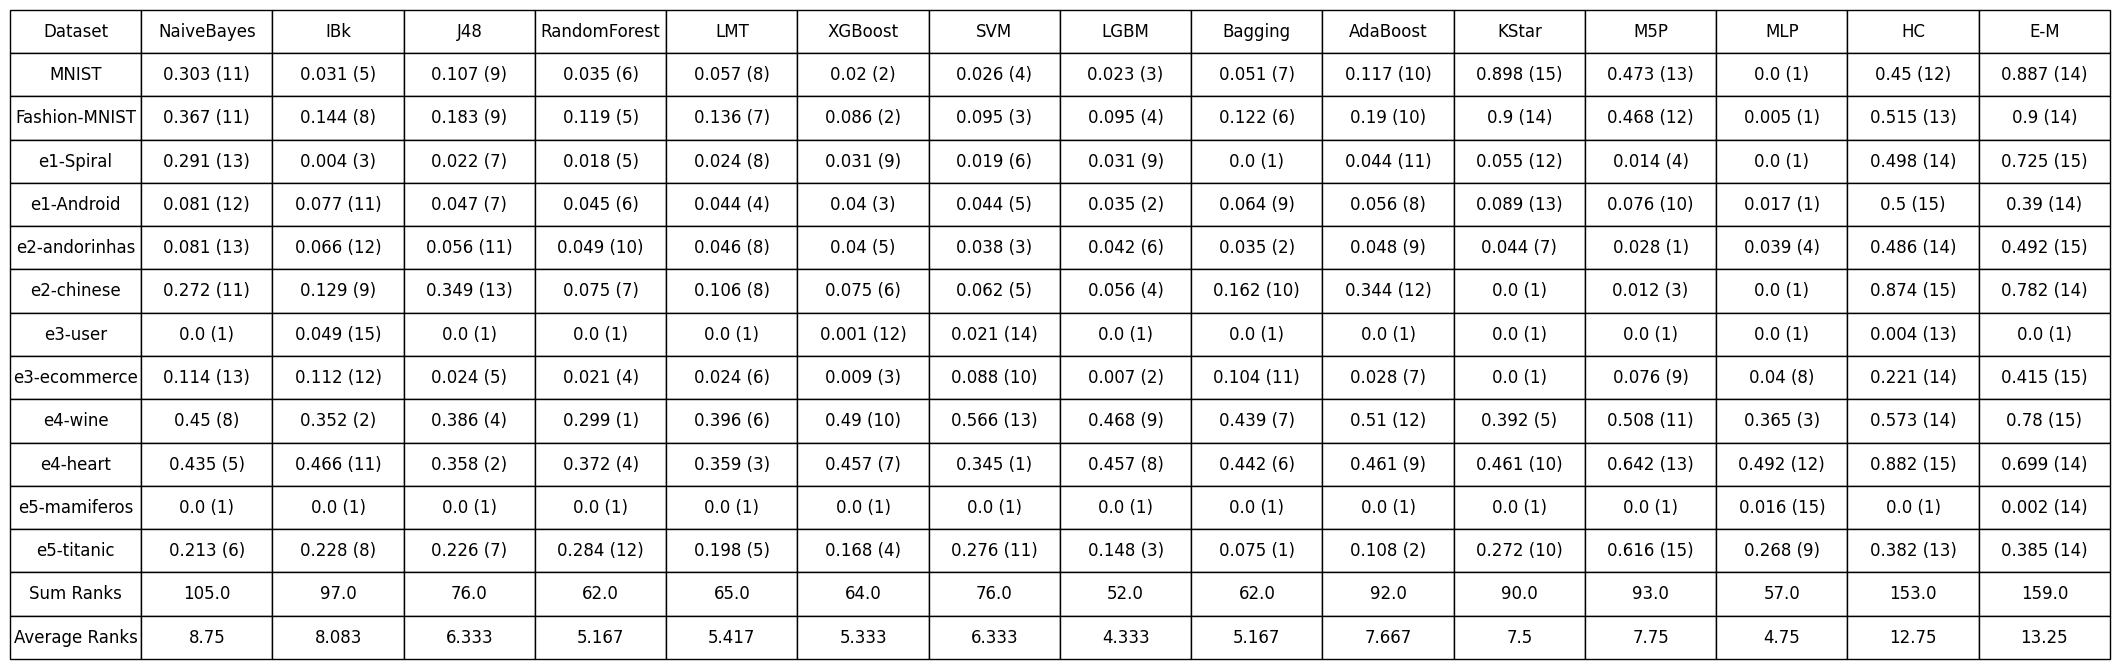

Table saved as 'table_with_rankings.png'
Friedman test statistic: 62.86301369863009, p-value = 3.6698419183447894e-08
Algorithms: ['NaiveBayes', 'IBk', 'J48', 'RandomForest', 'LMT', 'XGBoost', 'SVM', 'LGBM', 'Bagging', 'AdaBoost', 'KStar', 'M5P', 'MLP', 'HC', 'E-M']
Errors: [[3.03400e-01 3.09000e-02 1.06700e-01 3.51000e-02 5.70000e-02 2.05000e-02
  2.61000e-02 2.26000e-02 5.07000e-02 1.17400e-01 8.98000e-01 4.73100e-01
  0.00000e+00 4.49600e-01 8.86500e-01]
 [3.67200e-01 1.43500e-01 1.82700e-01 1.19200e-01 1.36200e-01 8.58000e-02
  9.47000e-02 9.50000e-02 1.22000e-01 1.90000e-01 9.00000e-01 4.67800e-01
  5.20000e-03 5.14500e-01 9.00000e-01]
 [2.91250e-01 3.80000e-03 2.25000e-02 1.75000e-02 2.37500e-02 3.12000e-02
  1.88000e-02 3.12000e-02 0.00000e+00 4.37000e-02 5.51000e-02 1.43000e-02
  0.00000e+00 4.97500e-01 7.25000e-01]
 [8.13170e-02 7.72850e-02 4.74910e-02 4.54750e-02 4.36830e-02 4.03000e-02
  4.37000e-02 3.47000e-02 6.38000e-02 5.60000e-02 8.94000e-02 7.61000e-02
  1.67000e-02 4.

<Figure size 1600x1200 with 0 Axes>

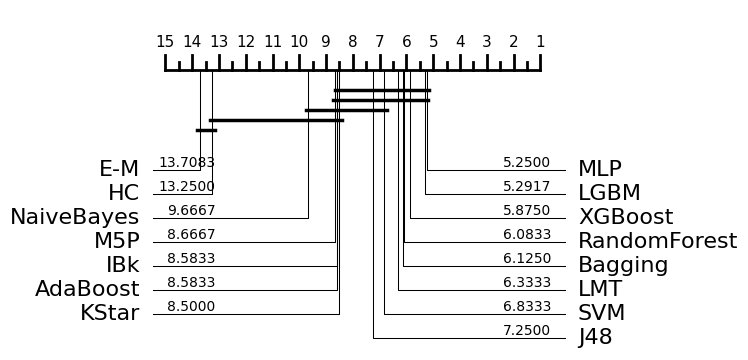

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from aeon.visualisation import plot_critical_difference

data = {
    'Datasets': [
      'MNIST', 'Fashion-MNIST', 
      'e1-Spiral', 'e1-Android',
      'e2-andorinhas', 'e2-chinese',
      'e3-user', 'e3-ecommerce',
      'e4-wine', 'e4-heart',
      'e5-mamiferos', 'e5-titanic'
    ],
    'Algorithms': [
        'NaiveBayes', 'IBk', 'J48', 'RandomForest', 'LMT', 
        'XGBoost', 'SVM', 'LGBM', 'Bagging', 'AdaBoost', 
        'KStar', 'M5P', 'MLP', 'HC', 'E-M'
    ],
    'Performance (Error)': [
        [ # MNIST -ok
            '30.34%', '3.09%', '10.67%', '3.51%', '5.70%', 
            '2.05%', '2.61%', '2.26%', '5.07%', '11.74%', 
            '89.80%', '47.31%', '0%', '44.96%', '88.65%'
        ],
        [ # Fashion-MNIST -ok
            '36.72%', '14.35%', '18.27%', '11.92%', '13.62%', 
            '8.58%', '9.47%', '9.50%', '12.20%', '19.00%',
            '90%', '46.78%', '0.52%', '51.45%', '90%'
        ],
        [ # e1-Spiral -ok
            '29.125%', '0.38%', '2.25%', '1.75%', '2.375%',
            '3.12%', '1.88%', '3.12%', '0%', '4.37%',
            '5.51%', '1.43%', '0%', '49.75%', '72.50%'
        ],
        [ # e1-Android -ok
            '8.1317%', '7.7285%', '4.7491%', '4.5475%', '4.3683%',
            '4.03%', '4.37%', '3.47%', '6.38%', '5.60%', 
            '8.94%', '7.61%', '1.67%', '49.98%', '38.95%'
        ],
        [   '8.1%', '6.65%', '5.60%', '4.90%', '4.60%', 
            '4.00%', '3.75%', '4.25%', '3.50%', '4.75%',
            '4.36%', '2.85%', '3.92%', '48.60%', '49.25%'
        ],
        [ # e2-chinese -ok
            '27.1589%', '12.8911%', '34.9186%', '7.5094%', '10.6383%',
            '7.50%', '6.25%', '5.63%', '16.25%', '34.38%', 
            '0%', '1.21%', '0%', '87.36%', '78.22%'
        ],
        [   '0%', '4.8571%', '0%', '0%', '0%', '0.1429%',
            '2.14%', '0%', '0%', '0%', '0%', '0%',
            '0%', '0.39%', '0%', '79.14%', '4.57%'
        ],
        [ # e3-ecommerce -ok
            '11.37%', '11.15%', '2.39%', '2.07%', '2.42%', 
            '0.90%', '8.80%', '0.70%', '10.35%', '2.85%', 
            '0.02%', '7.56%', '3.96%', '22.11%', '41.49%'
        ],
        [ # e4-wine -ok
            '44.96%', '35.21%', '38.59%', '29.89%', '39.65%',
            '48.95%', '56.56%', '46.85%', '43.94%', '50.99%', 
            '39.23%', '50.82%', '36.51%', '57.34%', '77.98%'
        ],
        [ # e4-heart -ok
            '43.51%', '46.61%', '35.82%', '37.20%', '35.88%',
            '45.71%', '34.51%', '45.73%', '44.16%', '46.1%', 
            '46.15%', '64.18%', '49.22%', '88.1962%', '69.94%'
        ],
        [ # e5-mamiferos -ok
            '0%', '0%', '0%', '0%', '0%', '0%',
            '0%', '0%', '0%', '0%', '0%', '0%',
            '1.57%', '0%', '0.20%', '31.20%', '44.80%'
        ],
        [ # e5-titanic -ok
            '21.3244%', '22.7834%', '22.5589%', '28.3951%', '19.7531%', 
            '16.76%', '27.56%', '14.85%', '7.48%', '10.79%', 
            '27.18%', '61.62%', '26.76%', '38.16%', '38.50%'
        ]
    ]
}

# Convert the data into a DataFrame
datasets = data['Datasets']
algorithms = data['Algorithms']
performance_data = data['Performance (Error)']

# Create a list of dictionaries for each dataset
rows = []
for dataset, performance in zip(datasets, performance_data):
    row = {'Dataset': dataset}
    row.update({alg: perf for alg, perf in zip(algorithms, performance)})
    rows.append(row)

# Create the DataFrame
df = pd.DataFrame(rows)

# Convert string percentages to floats
for alg in algorithms:
    df[alg] = df[alg].str.replace(',', '.').str.rstrip('%').astype(float) / 100

# Calculate the ranking of each algorithm for each dataset
rankings_matrix = df[algorithms].rank(axis=1, method='min', ascending=True)

# Format the results
formatted_results = df[algorithms].copy()
for col in formatted_results.columns:
    formatted_results[col] = formatted_results[col].round(3).astype(str) + " (" + rankings_matrix[col].astype(int).astype(str) + ")"

# Add a row for the sum of ranks and average of ranks
sum_ranks = rankings_matrix.sum().round(3).rename('Sum Ranks')
average_ranks = rankings_matrix.mean().round(3).rename('Average Ranks')

# Add the rows to the formatted DataFrame using concat
formatted_results = pd.concat([formatted_results, sum_ranks.to_frame().T, average_ranks.to_frame().T])

# Add the 'Dataset' column to the formatted DataFrame
formatted_results.insert(0, 'Dataset', df['Dataset'].tolist() + ['Sum Ranks', 'Average Ranks'])

# Display the table
print("Error Table (%) with Ranking:")
print(formatted_results)

# Save the formatted table as an image
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=formatted_results.values, colLabels=formatted_results.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.5, 2.5)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=1, wspace=0.2, hspace=0.2)
plt.savefig('table_with_rankings.png', format="png", bbox_inches="tight", dpi=300)
plt.show()

print("Table saved as 'table_with_rankings.png'")

# Perform the Friedman Test
friedman_stat, p_value = friedmanchisquare(*rankings_matrix.T.values)
print(f"Friedman test statistic: {friedman_stat}, p-value = {p_value}")

# Convert the accuracy matrix into a NumPy array for the critical difference diagram
scores = df[algorithms].values
classifiers = df[algorithms].columns.tolist()

print("Algorithms:", classifiers)
print("Errors:", scores)

# Set the figure size before plotting
plt.figure(figsize=(16, 12))  # Adjust the figure size as needed

# Generate the critical difference diagram
plot_critical_difference(
    scores, 
    classifiers, 
    lower_better=True,
    test='wilcoxon',  # or nemenyi
    correction='holm', # or bonferroni or none
)

# Get the current axes
ax = plt.gca()

# Adjust font size and rotation of x-axis labels
for label in ax.get_xticklabels():
    label.set_fontsize(14) 
    label.set_rotation(45) 
    label.set_horizontalalignment('right')

# Increase padding between labels and axis
ax.tick_params(axis='x', which='major', pad=20)

# Adjust margins to provide more space for labels
plt.subplots_adjust(bottom=0.35)

# Optionally adjust y-axis label font size
ax.tick_params(axis='y', labelsize=12)

# Save and display the plot
# plt.savefig('critical_difference_diagram.png', format="png", bbox_inches="tight", dpi=300)
plt.show()